<a href="https://colab.research.google.com/github/s4kh4rov/BMIL/blob/master/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
 len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [9]:
network.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255 

In [11]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [12]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2558 - accuracy: 0.9260
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1026 - accuracy: 0.9697
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0663 - accuracy: 0.9803
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0499 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0366 - accuracy: 0.9888


In [13]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0663 - accuracy: 0.9794
test_acc: 0.9793999791145325


1/1 [==============================] - 0s 18ms/step


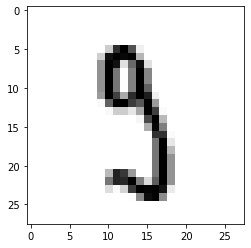

Исходное число  9
Предсказанное число  8
1/1 [==============================] - 0s 19ms/step


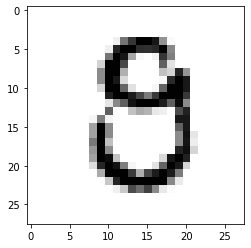

Исходное число  9
Предсказанное число  8
1/1 [==============================] - 0s 18ms/step


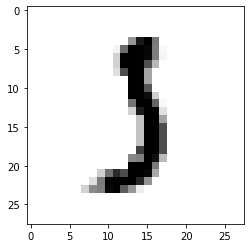

Исходное число  5
Предсказанное число  3
1/1 [==============================] - 0s 17ms/step


In [31]:
index = 90
digit = train_images[index]
import matplotlib.pyplot as plt
import matplotlib.image
for i in range(200):
  digit = train_images[i]
  digit = digit.reshape(1,28*28)
  result = network.predict(digit)
  if(train_labels[i].argmax()!=result.argmax()):
    digit = digit.reshape(28, 28)
    plt.imshow(digit, cmap=plt.cm.binary)
    plt.show()
    matplotlib.image.imsave('/content/drive/MyDrive/lab1/img{}.jpeg'.format(i),digit)
    print('Исходное число ', train_labels[i].argmax())
    print('Предсказанное число ',result.argmax())
# digit = digit.reshape(1,28*28)
# result = network.predict(digit)


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
